<a href="https://colab.research.google.com/github/urazalinuraliev/My-Mobapp-studio-project/blob/main/my_mobapp_studio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: googleplaystore.csv     
  inflating: googleplaystore_user_reviews.csv  
  inflating: license.txt             


In [ ]:
def load_dataset():
  return pd.read_csv('googleplaystore.csv')

dataset = load_dataset()
# dataset.head()

In [ ]:
def print_summarize_dataset(dataset):
   print("Dataset dimension:")
   print(dataset.shape)
   print("First 10 rows of dataset:")
   print(dataset.head(10))
   print("Statistical summary:")
   print(dataset.describe())
print_summarize_dataset(dataset)


In [ ]:
def clean_dataset(dataset):
    dataset['App'] = dataset['App'].str.replace('&', '')
    dataset['App'] = dataset['App'].str.replace('-', '')
    dataset['App'] = dataset['App'].str.title()
    dataset['Category'] = dataset['Category'].str.replace('_', ' ')
    dataset['Category'] = dataset['Category'].str.lower()
    dataset['Installs'] = dataset['Installs'].str.replace('+', '')
    dataset['Genres'] = dataset['Genres'].str.replace('&', '')
    dataset['Genres'] = dataset['Genres'].str.replace(';', '')
    dataset["Last Updated"] = dataset["Last Updated"].str.replace('[a-zA-Z]','', regex=True )
    dataset['Price'] = dataset['Price'].str.replace('$', '')
    dataset['Price'] = dataset['Price'].str.replace('Everyone', '0')
    dataset['Reviews'] = dataset['Reviews'].str.replace('[a-zA-Z]', '', regex=True)
    dataset['Reviews'] = dataset['Reviews'].str.replace('.', '')
    dataset['Size'] = dataset['Size'].str.replace('+', '')
    dataset['Size'] = dataset['Size'].str.replace(',', '.')
    dataset['Reviews'] = dataset['Reviews'].map(lambda x: int(x))
    dataset['Size'] = dataset['Size'].str.replace('M', '')
    dataset['Size'] = dataset['Size'].str.replace('k', '000')
    dataset['Size'] = dataset['Size'].str.replace('Varies with device', '0')
    dataset['Installs'] = dataset['Installs'].str.replace(',', '')
    dataset['Installs'] = dataset['Installs'].str.replace('Free', '0')
    dataset['Price'] = dataset['Price'].astype(float)
    dataset['Size'] = dataset['Size'].astype(float)
    dataset['Size'] = dataset['Size'].astype(int)
    dataset['Installs'] = dataset['Installs'].astype(int)

clean_dataset(dataset)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from Tr

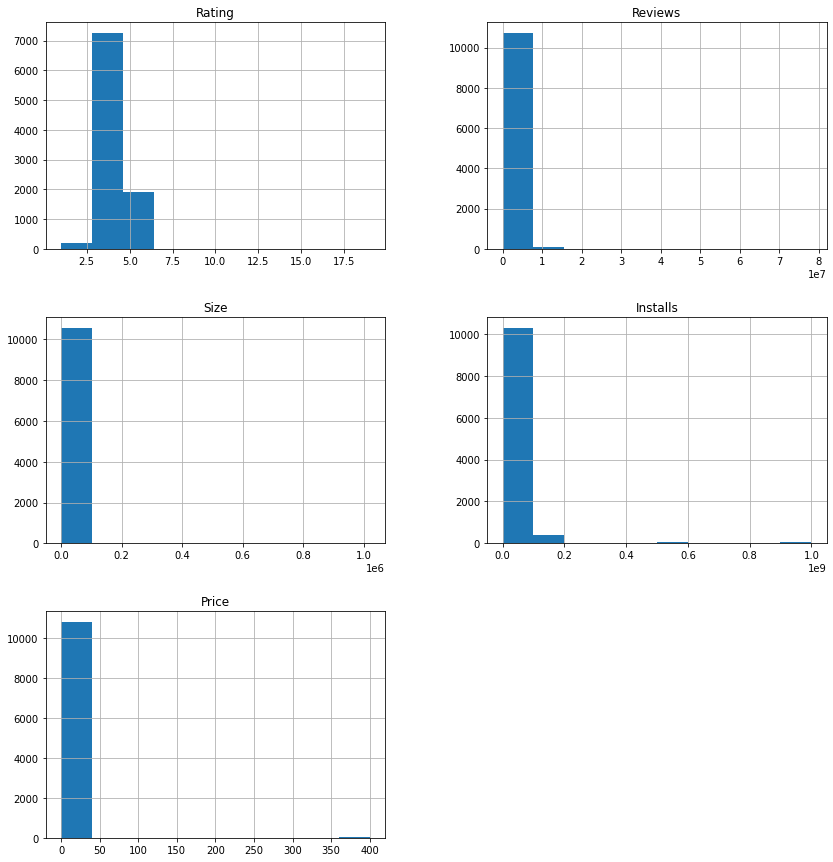

In [ ]:
def print_histograms(dataset):
  dataset.hist(figsize=(14,15))
print_histograms(dataset)

In [ ]:
def compute_correlations_matrix(dataset):

  correlations = dataset.corr()
  dat = correlations["Price"].abs().sort_values(ascending=False)
  print(dat)
  x = np.median(dat)
  print(f"median is {x} ")
compute_correlations_matrix(dataset)

Price       1.000000
Rating      0.021176
Size        0.020971
Installs    0.011688
Reviews     0.009666
Name: Price, dtype: float64
median is 0.02097126651979443 


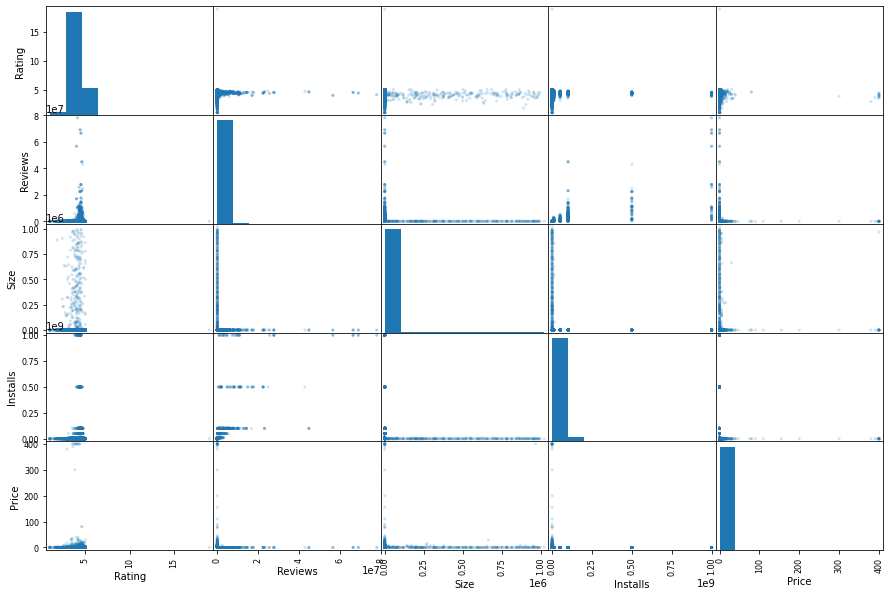

In [ ]:
def print_scatter_matrix(dataset):
  df = dataset[['Rating', 'Reviews', 'Size', 'Installs', 'Price']]
  pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15,10))
print_scatter_matrix(dataset) 

In [ ]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor Candy Camera Grid Scrapbook,art and design,4.1,159,19,10000,Free,0.0,Everyone,Art Design,"7, 2018",1.0.0,4.0.3 and up
1,Coloring Book Moana,art and design,3.9,967,14,500000,Free,0.0,Everyone,Art DesignPretend Play,"15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – Free Live Cool Themes, Hide ...",art and design,4.7,87510,8,5000000,Free,0.0,Everyone,Art Design,"1, 2018",1.2.4,4.0.3 and up
3,Sketch Draw Paint,art and design,4.5,215644,25,50000000,Free,0.0,Teen,Art Design,"8, 2018",Varies with device,4.2 and up
4,Pixel Draw Number Art Coloring Book,art and design,4.3,967,2,100000,Free,0.0,Everyone,Art DesignCreativity,"20, 2018",1.1,4.4 and up


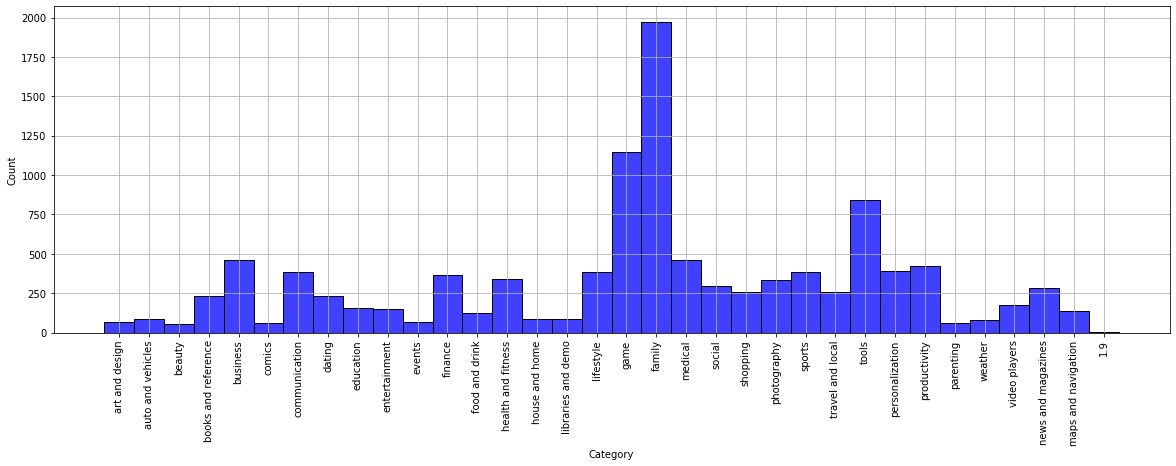

In [ ]:
plt.figure(figsize=(20,6))
plt.grid()
sns.histplot(data=dataset, x='Category', color='blue')
plt.xticks(rotation=90)
plt.show()

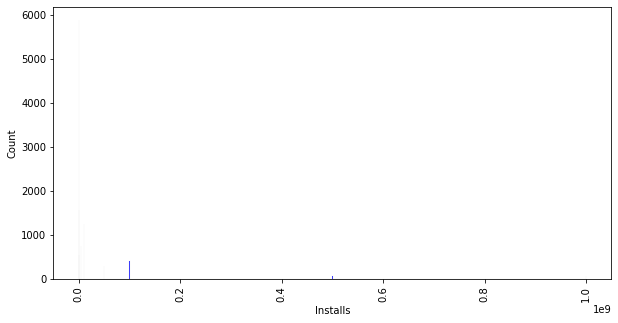

In [ ]:
sns.countplot(x='Region',hue='Revenue',data=data)

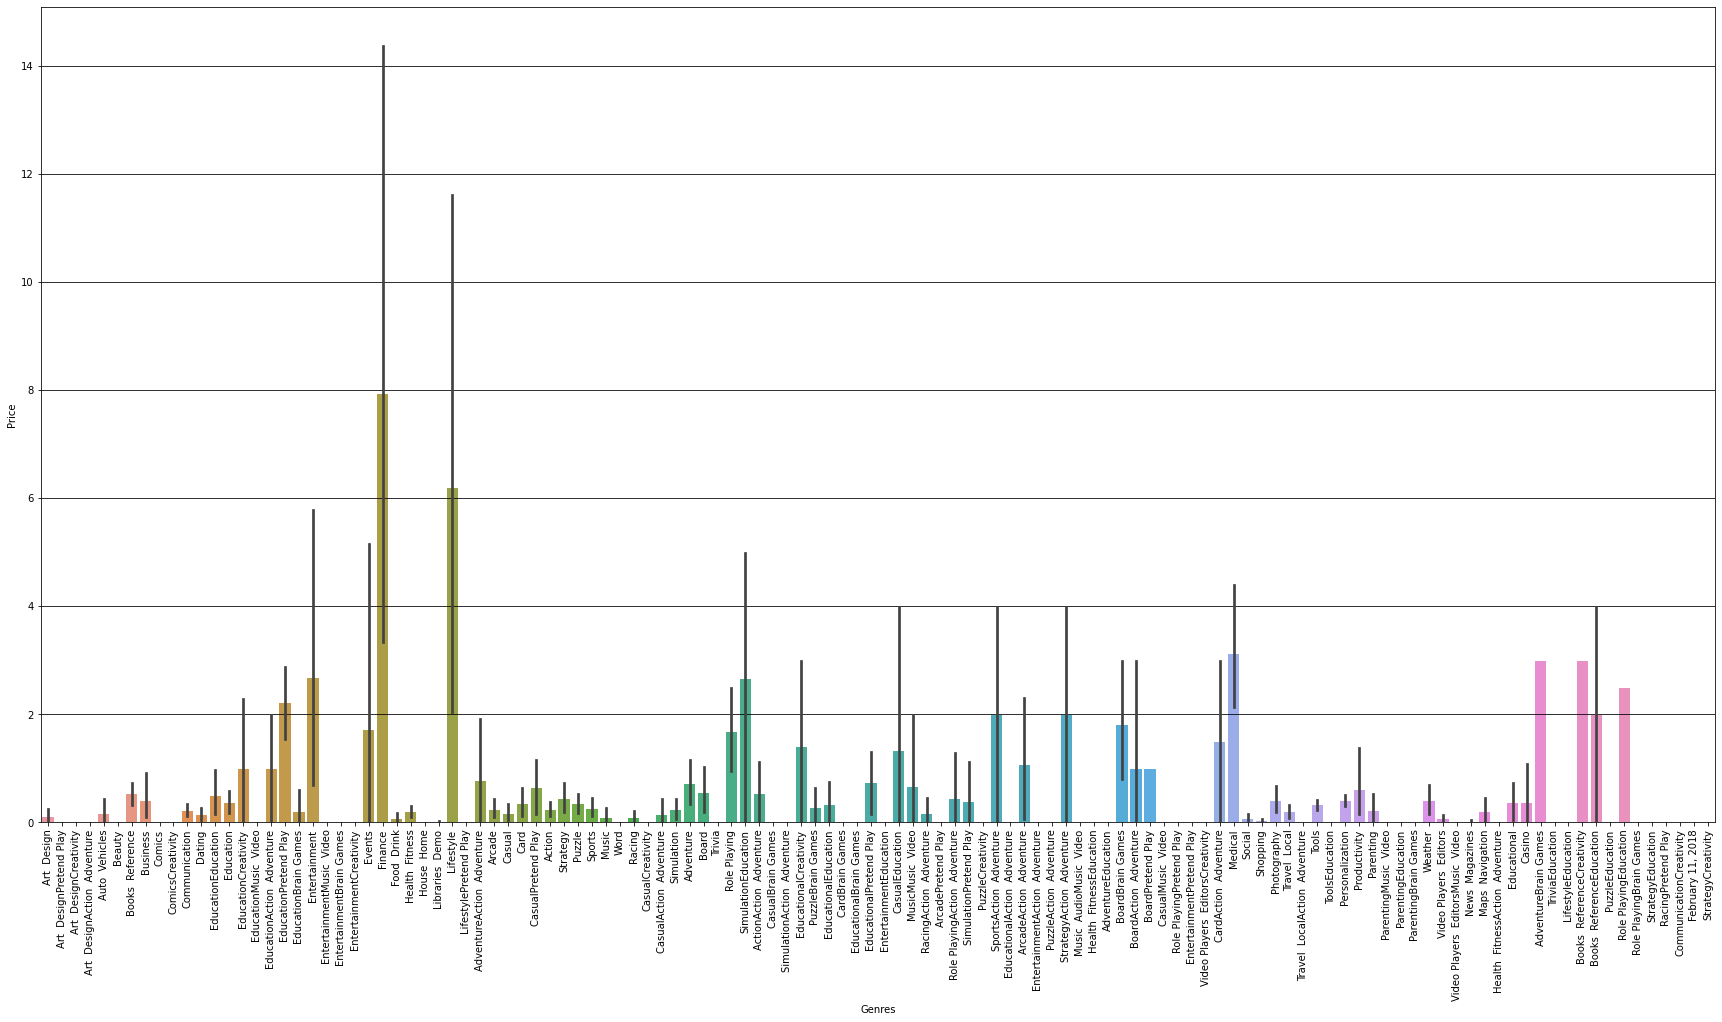

In [ ]:
plt.figure(figsize=(30, 15))
plt.xticks(rotation=90)
plt.grid(color='k')
sns.barplot(x=dataset['Genres'], y=dataset['Price'])
plt.show()

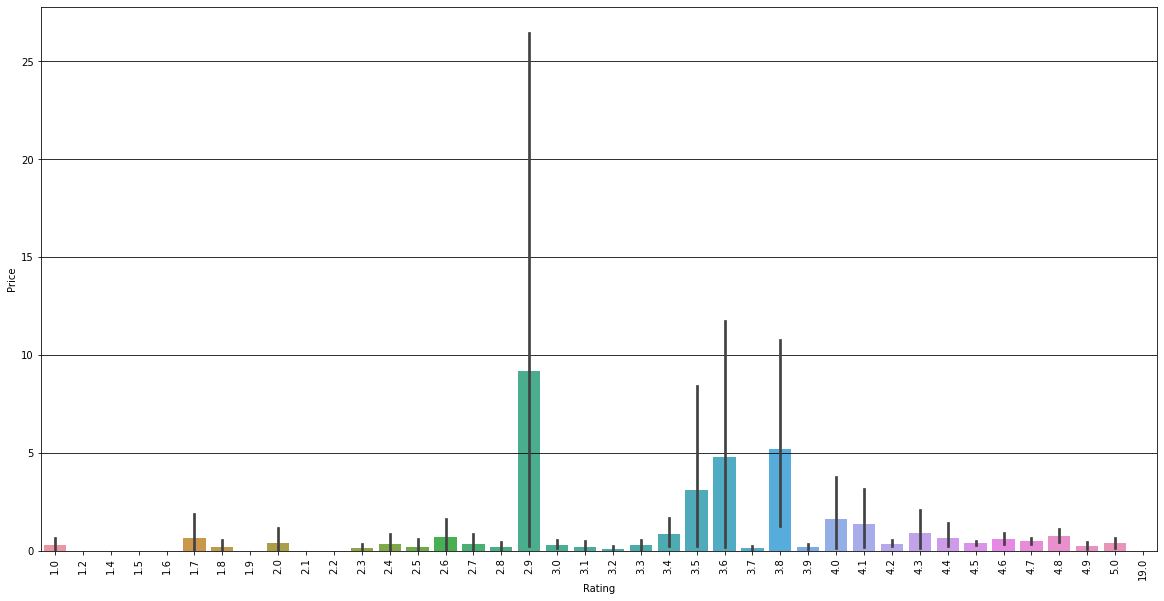

In [ ]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.grid(color='k')
sns.barplot(x=dataset["Rating"], y=dataset["Price"])
plt.show()